In [1]:
#Import libraries

import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
from functools import reduce

# Task 1

### NCDC Covid Data

In [2]:
#Store url in variable and get url using requests

url = 'https://covid19.ncdc.gov.ng/'
pg = requests.get(url)

In [3]:
#Create a beautiful soup object

bsoup = BeautifulSoup(pg.content, 'html.parser')

In [4]:
#Locate table to be extracted

results = bsoup.find(id = 'custom1')

In [5]:
#Extract table column headers

col_titles = []
for title in results.find_all('th'):
    col_titles.append(title.text.strip())

In [6]:
#Extract table rows

rows = []
rowdata = results.find_all('tr')[1:]
for data in rowdata:
    row_content = data.find_all('td')
    row_content_list = []
    for item in row_content:
        row_content_list.append(item.text.strip())
    rows.append(row_content_list)  
   

In [7]:
#Create dataframe

ncdc_CovidData = pd.DataFrame(rows, columns = col_titles)
ncdc_CovidData.head(3)

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"58,801","1,372","56,990",439
1,FCT,"19,849",577,"19,106",166
2,Kaduna,"9,068",1,"9,002",65


### John Hopkins Covid Data

In [8]:
#Global daily confirmed cases

d_confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
jh_confirmed = pd.read_csv(d_confirmed_url)

In [9]:
#Global daily recovered cases

d_recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
jh_recovered = pd.read_csv(d_recovered_url)

In [10]:
#Global daily death cases

d_deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
jh_deaths = pd.read_csv(d_deaths_url)

### External data sources

In [11]:
#Import CSV files

covext_df = pd.read_csv("covid_external.csv")
covnig_df = pd.read_csv("covidnig.csv")
budget_df = pd.read_csv('Budget data.csv')
gdp_df = pd.read_csv('RealGDP.csv')

# Task 2

In [12]:
#View dataframes with head()

ncdc_CovidData.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"58,801","1,372","56,990",439
1,FCT,"19,849",577,"19,106",166
2,Kaduna,"9,068",1,"9,002",65
3,Plateau,"9,060",1,"9,002",57
4,Rivers,"7,215",73,"7,041",101


In [13]:
jh_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149


In [14]:
jh_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,54619,54634,54663,54686,55010,55118,55529,55687,55790,55889
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,121122,122105,123081,124312,125419,126405,127240,127869,128425,128601
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,87003,87137,87251,87359,87476,87609,87746,87902,88066,88208
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13104,13155,13155,13155,13211,13234,13234,13234,13234,13234
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25629,25650,25703,25715,25995,26013,26458,26483,26513,26775


In [15]:
jh_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2721,2730,2733,2742,2745,2751,2762,2772,2782,2792
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2426,2427,2429,2432,2435,2436,2438,2440,2441,2442
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3355,3360,3366,3374,3381,3388,3395,3401,3405,3411
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,649,651,655,659,677,685,696,704,709,715


In [16]:
covext_df.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [17]:
covnig_df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


In [18]:
budget_df.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [19]:
gdp_df.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [20]:
#Get information about dataframes usinf .info()

ncdc_CovidData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


In [21]:
jh_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 491 entries, Province/State to 5/22/21
dtypes: float64(2), int64(487), object(2)
memory usage: 1.0+ MB


In [22]:
jh_recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 491 entries, Province/State to 5/22/21
dtypes: float64(2), int64(487), object(2)
memory usage: 997.5+ KB


In [23]:
jh_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 491 entries, Province/State to 5/22/21
dtypes: float64(2), int64(487), object(2)
memory usage: 1.0+ MB


In [24]:
covext_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [25]:
covnig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


In [26]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [27]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


# Task 3

### TODO A:  Clean scraped data

In [28]:
ncdc_CovidData.columns

Index(['States Affected', 'No. of Cases (Lab Confirmed)',
       'No. of Cases (on admission)', 'No. Discharged', 'No. of Deaths'],
      dtype='object')

In [29]:
#Rename columns and set index using the states column

ncdc_CovidData.rename(columns= {"States Affected": "states", "No. of Cases (Lab Confirmed)": "confirmed", 
                               "No. of Cases (on admission)": "admitted", "No. Discharged": "discharged", 
                               "No. of Deaths": "deaths"}, inplace = True)

ncdc_CovidData.set_index("states", inplace = True)

In [30]:
#Remove commas in dataframe

ncdc_CovidData = ncdc_CovidData.replace(",", "",regex = True).astype(int)
ncdc_CovidData.dtypes

confirmed     int64
admitted      int64
discharged    int64
deaths        int64
dtype: object

### TODO B: Get daily confirmed cases for Nigeria

In [31]:
#Create a dataframe with dates and corresponding number of confirmed cases

nig_confirmed = jh_confirmed.loc[jh_confirmed["Country/Region"] == "Nigeria"]
nig_confirmed.drop(["Province/State","Lat","Long"], axis = 1, inplace = True)
vals = nig_confirmed.iloc[:, 38:]
nig_jhconfirmed = pd.melt(nig_confirmed, value_vars= vals, var_name= 'Dates', value_name= 'Daily Confirmed Cases')
nig_jhconfirmed['Dates'] = pd.to_datetime(nig_jhconfirmed['Dates'])

In [32]:
nig_jhconfirmed.head(3)

,Dates,Daily Confirmed Cases
0,2020-02-28,1
1,2020-02-29,1
2,2020-03-01,1


### TODO C: Get daily recovered cases for Nigeria

In [33]:
#Create a dataframe with dates and corresponding number of recovered cases

nig_recovered = jh_recovered.loc[jh_recovered["Country/Region"] == "Nigeria"]
nig_recovered.drop(["Province/State","Lat","Long"], axis = 1, inplace = True)
vals = nig_recovered.iloc[:,57:]
nig_jhrecovered = pd.melt(nig_recovered, value_vars= vals, var_name= 'Dates', value_name= 'Daily Recovered Cases')
nig_jhrecovered['Dates'] = pd.to_datetime(nig_jhrecovered['Dates'])

In [34]:
nig_jhrecovered.tail(3)

,Dates,Daily Recovered Cases
428,2021-05-20,156459
429,2021-05-21,156462
430,2021-05-22,156468


### TODO D: Get daily death cases for Nigeria

In [35]:
#Create a dataframe with dates and corresponding number of reported death cases

nig_deaths = jh_deaths.loc[jh_deaths["Country/Region"] == "Nigeria"]
nig_deaths.drop(["Province/State","Lat","Long"], axis = 1, inplace = True)
vals = nig_deaths.iloc[:,62:]
nig_jhdeaths = pd.melt(nig_deaths, value_vars= vals, var_name= 'Dates', value_name= 'Daily Death Cases')
nig_jhdeaths['Dates'] = pd.to_datetime(nig_jhdeaths['Dates'])

In [36]:
nig_jhdeaths.tail(3)

,Dates,Daily Death Cases
423,2021-05-20,2067
424,2021-05-21,2067
425,2021-05-22,2067


# TASK 4 : Analysis

### TODO A: Plot showing top 10 states with confirmed cases

In [37]:
topten_C = ncdc_CovidData.nlargest(10,'confirmed')

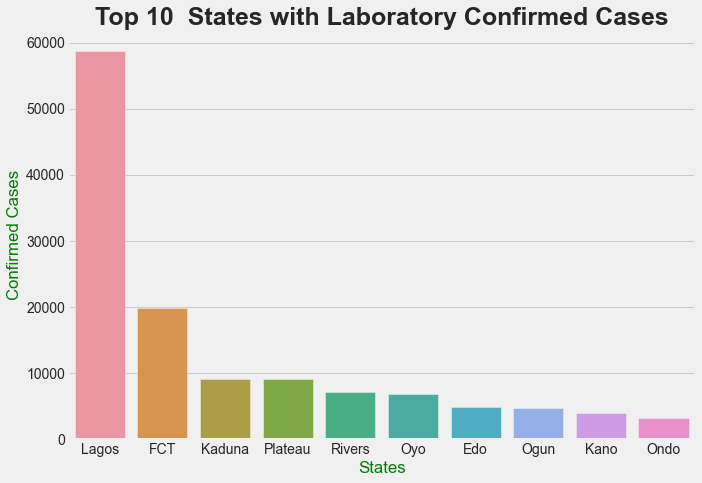

In [38]:
#Create figure object and plot

plt.figure(figsize = (10,7))
topten_Cplt = sns.barplot(data = topten_C.reset_index(), x = 'states', y = 'confirmed')

#Set plot title and y_axis label

topten_Cplt.set_title("Top 10  States with Laboratory Confirmed Cases", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
topten_Cplt.set_xlabel("States", color = "g")
topten_Cplt.set_ylabel("Confirmed Cases", color = "g")

plt.show()

### TODO B: Plot showing top 10 states with discharged cases

In [39]:
topten_Dis = ncdc_CovidData.sort_values(by='discharged', ascending = False).head(10)

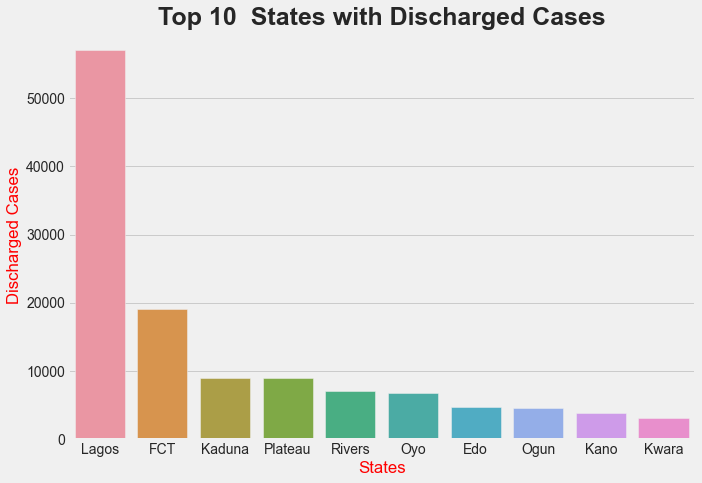

In [40]:
#Create figure object and plot

plt.figure(figsize = (10,7))
topten_Displt = sns.barplot(data = topten_Dis.reset_index(), x = 'states', y = 'discharged')

#Set plot title and y_axis label

topten_Displt.set_title("Top 10  States with Discharged Cases", fontdict= {'fontsize': 25, 'fontweight': 'bold'})
topten_Displt.set_xlabel("States", color = "r")
topten_Displt.set_ylabel("Discharged Cases", color = "r")
plt.show()

### TODO D: Plot showing top 10 states with death cases

In [41]:
topten_dths = ncdc_CovidData.nlargest(10, 'deaths')

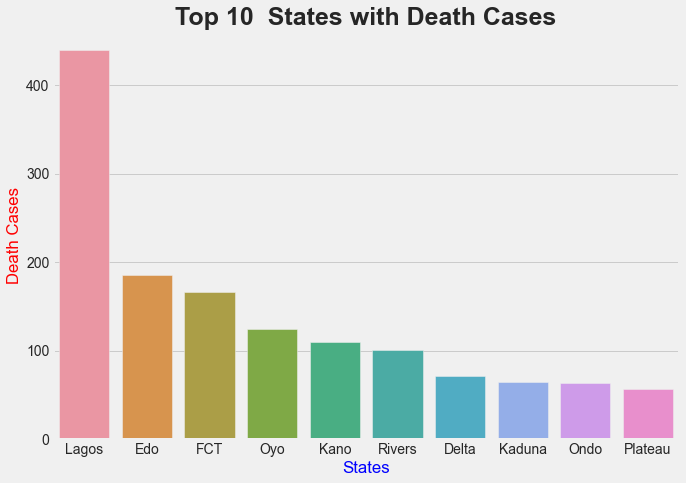

In [42]:
#Create figure object and plot

plt.figure(figsize = (10,7))
topten_dthsplt = sns.barplot(data = topten_dths.reset_index(), x = 'states', y = "deaths")

#Set plot title and y_axis label
topten_dthsplt.set_title("Top 10  States with Death Cases", fontdict = {'fontsize': 25, 'fontweight': 'bold'})
topten_dthsplt.set_xlabel("States", color = "b")
topten_dthsplt.set_ylabel("Death Cases", color = "r")

plt.show()

### SUMMARY
### ‣All other states but Edo and Kwara are consistent in their placements as regards confirmed, discharged and death cases

### TODO E: Line plot showing total daily confirmed, recovered and death cases in Nigeria

In [43]:
#Merge daily confirmed, daily recovered and daily death cases into a single dataframe

nig_dailyData = reduce(lambda x,y: pd.merge(x,y, on='Dates', how='outer'), [nig_jhconfirmed, nig_jhrecovered, nig_jhdeaths])
nig_dailyData.tail()

,Dates,Daily Confirmed Cases,Daily Recovered Cases,Daily Death Cases
445,2021-05-18,165778,156415.0,2067.0
446,2021-05-19,165852,156456.0,2067.0
447,2021-05-20,165901,156459.0,2067.0
448,2021-05-21,165944,156462.0,2067.0
449,2021-05-22,165979,156468.0,2067.0


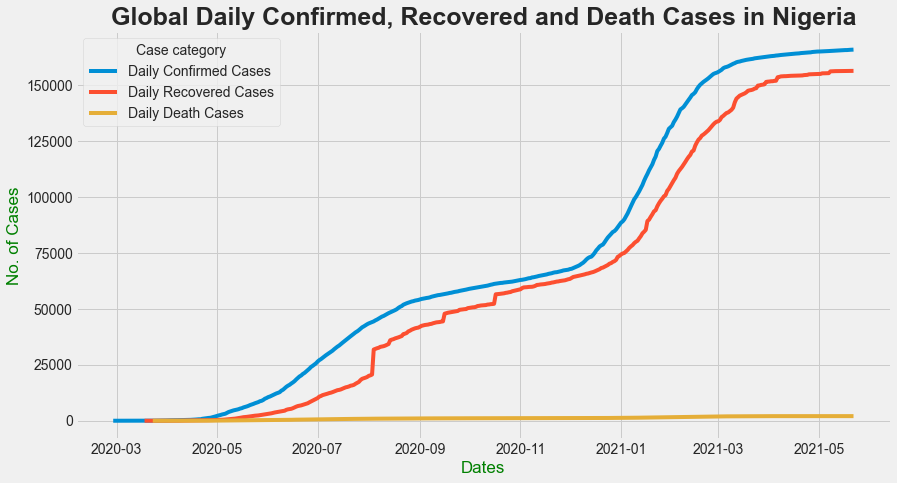

In [44]:
#Create figure object and plot

plt.figure(figsize = (13,7))
nig_dailyData_plt = sns.lineplot(x='Dates', y='No. of Cases', hue='Case category', data=pd.melt(nig_dailyData, ['Dates'], var_name= 'Case category', value_name= "No. of Cases"))

#Set plot title and axes labels
nig_dailyData_plt.set_title("Global Daily Confirmed, Recovered and Death Cases in Nigeria", fontdict= {'fontsize': 25, 'fontweight': 'bold'})
nig_dailyData_plt.set_xlabel("Dates",size =17, color = "g")
nig_dailyData_plt.set_ylabel("No. of Cases",size =17, color = "g")

plt.show()

### TODO F: Daily Infection Rate

In [45]:
nig_infRate = nig_jhconfirmed['Daily Confirmed Cases'].diff()

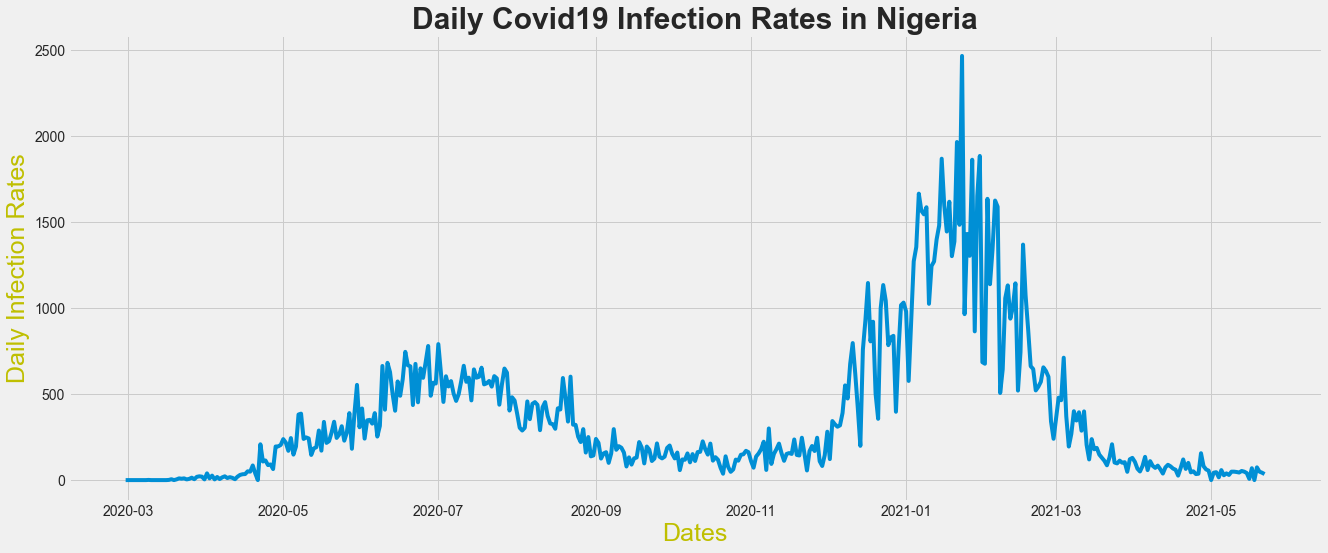

In [46]:
#Create figure object and plot

plt.figure(figsize= (20,8))
nig_infRate_plt = sns.lineplot(x = nig_jhconfirmed["Dates"], y = nig_infRate)

#Set plot title
nig_infRate_plt.set_title("Daily Covid19 Infection Rates in Nigeria", fontdict = {"fontsize": 30, "fontweight": "bold"})
plt.xlabel("Dates", fontdict= {"fontsize": 25}, color = "y")
plt.ylabel("Daily Infection Rates", fontdict= {"fontsize": 25}, color = "y")
plt.show()

### TODO G: Calculate maximum infection rate for a day (Number of new cases) and find corresponding date

In [47]:
#Include daily infection rates in daily reports data

nig_dailyData["Daily Infection Rates"] = nig_dailyData['Daily Confirmed Cases'].diff()
nig_dailyData.tail()

,Dates,Daily Confirmed Cases,Daily Recovered Cases,Daily Death Cases,Daily Infection Rates
445,2021-05-18,165778,156415.0,2067.0,0.0
446,2021-05-19,165852,156456.0,2067.0,74.0
447,2021-05-20,165901,156459.0,2067.0,49.0
448,2021-05-21,165944,156462.0,2067.0,43.0
449,2021-05-22,165979,156468.0,2067.0,35.0


In [48]:
#Find index of maximum infection rate

nig_dailyData.index[nig_dailyData["Daily Infection Rates"] == nig_dailyData["Daily Infection Rates"].max()]

Int64Index([330], dtype='int64')

In [49]:
#Locate date with highest infection rate using index

nig_dailyData["Dates"].iloc[330]

Timestamp('2021-01-23 00:00:00')

### TODO H

In [50]:
#Combine external covid date with ncdc covid data on common column

merged_cov_data = pd.merge(covext_df, ncdc_CovidData, on = "states")
merged_cov_data.head(3)

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,confirmed,admitted,discharged,deaths
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,19849,577,19106,166
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,9060,1,9002,57
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,3123,1,3067,55


In [51]:
top10_merged = merged_cov_data.nlargest(10, "confirmed").reset_index(drop = True)
top10_merged.head(3)

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,confirmed,admitted,discharged,deaths
0,Lagos,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93,58801,1372,56990,439
1,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,19849,577,19106,166
2,Kaduna,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86,9068,1,9002,65


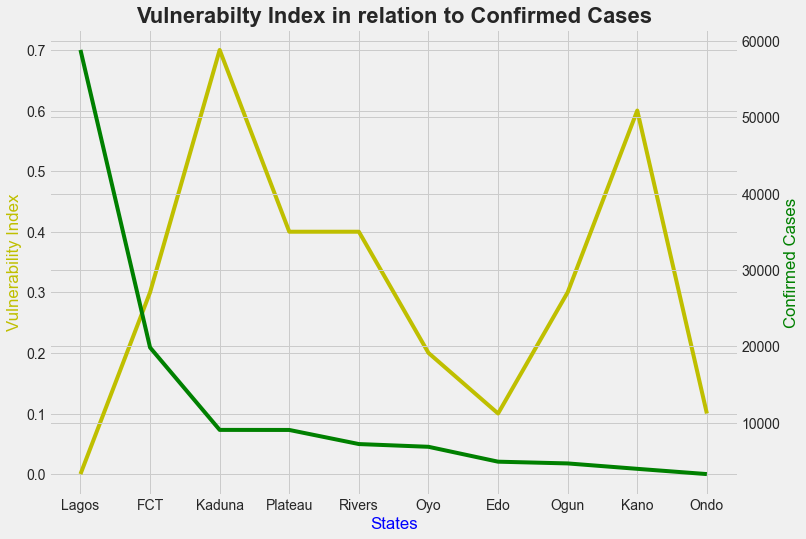

In [52]:
x = top10_merged['states']
y1 = top10_merged["Overall CCVI Index"]
y2 = top10_merged["confirmed"]

#Create axis object
fig, ax = plt.subplots(figsize = (11, 8))


#Create second axis object for second y axis

ax2 = ax.twinx()
ax.plot(x, y1, color = 'y')
ax2.plot(x, y2, color = 'g')
  
#Set x and y axes labels

ax.set_xlabel('States', color = 'b')
ax.set_ylabel('Vulnerability Index', color = 'y')
ax2.set_ylabel('Confirmed Cases', color = 'g')

#Set plot title
plt.title("Vulnerabilty Index in relation to Confirmed Cases", fontdict = {"fontsize": 22, "fontweight": "bold"})
  
plt.show()

### TODO I: Regression plot of Confirmed Cases against Population Density

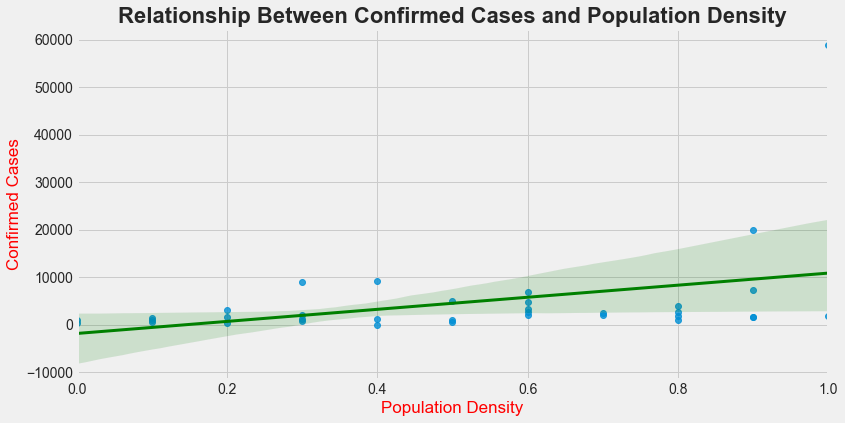

In [53]:
#Create figure object and plot

plt.figure(figsize = (12,6))
pd_C_plt = sns.regplot(x = 'Population Density', y = 'confirmed', data = merged_cov_data, line_kws={"color":"g","lw":3})

#Set plot and y_axis label

pd_C_plt.set_title("Relationship Between Confirmed Cases and Population Density", fontdict = {"fontsize": 22, "fontweight": "bold"})
pd_C_plt.set_xlabel("Population Density", fontdict= {"fontsize": 17}, color= "r")
pd_C_plt.set_ylabel("Confirmed Cases", fontdict= {"fontsize": 17}, color= "r")
plt.show()

### SUMMARY
#### ‣ This plot shows a weak positive correlation between population density and number of laboratory confirmed cases 
#### ‣ This therefore means though there are other factors affecting the occurence of confirmed cases, how populated the area is, has some effect on the spread of the disease

### TODO J: Perform more analysis 

### Calculate the mortality rate for each state

In [54]:
merged_cov_data["Mortality rate (%)"] = (merged_cov_data['deaths']/merged_cov_data['Population'])*100
merged_cov_data.head(3)

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR,confirmed,admitted,discharged,deaths,Mortality rate (%)
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79,19849,577,19106,166,0.003412
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93,9060,1,9002,57,0.001196
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93,3123,1,3067,55,0.001561


### Plot a corresponding graph

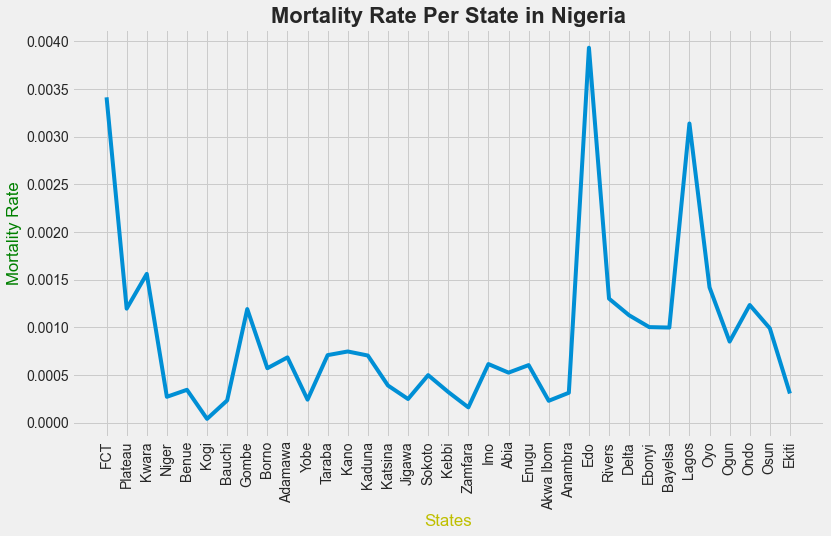

In [55]:
#Create figure object and plot

plt.figure(figsize= (12,7))
plot = sns.lineplot(x = 'states', y = "Mortality rate (%)", data = merged_cov_data)

#Rotate tick labels on x axis for readability

plt.setp(plot.get_xticklabels(), rotation=90)

#Set plot title and axes labels

plot.set_xlabel("States", color = "y")
plot.set_ylabel("Mortality Rate", color = "g")
plot.set_title("Mortality Rate Per State in Nigeria", fontdict = {"fontsize": 22,"fontweight":"bold"})

plt.show()

### SUMMARY
#### ‣ The graph peaks at 3 points, representing the states with the 3 highest values
#### ‣ Edo state has the highest mortality rate, followed by FCT, then Lagos.
#### ‣ These statistics, indicate the frequency of death occurence in relation to the number of inhabitants of each state
#### ‣ The higher the mortality rate, the higher the decrease in population size caused by Covid19

### Provide cummulative region specific information about confirmed cases, recovered and death cases

In [56]:
merged_cov_data["region"].unique()

array(['North Central', 'North East', 'North West', 'South East',
       'South South', 'South West'], dtype=object)

In [57]:
reg_grps = merged_cov_data.groupby("region")

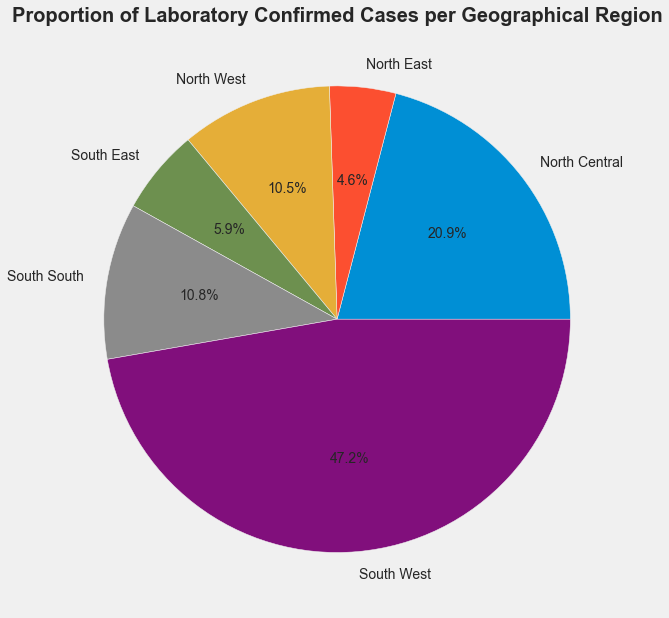

In [58]:
#Aggregate confirmed cases

reg_C = reg_grps.agg({"confirmed": "sum"})

#Create figure object and plot

plt.figure(figsize= (15,10))
plt.pie(reg_C.confirmed, labels=reg_C.index, autopct='%1.1f%%')

#Set plot title

plt.title("Proportion of Laboratory Confirmed Cases per Geographical Region", fontdict = {"fontsize": 20, "fontweight": "bold"})

plt.show()

### SUMMARY
#### ‣ Based on geopolitical zones, the South West, has the highest number of laboratory confirmed Covid19 cases, followed by North Central then, South South

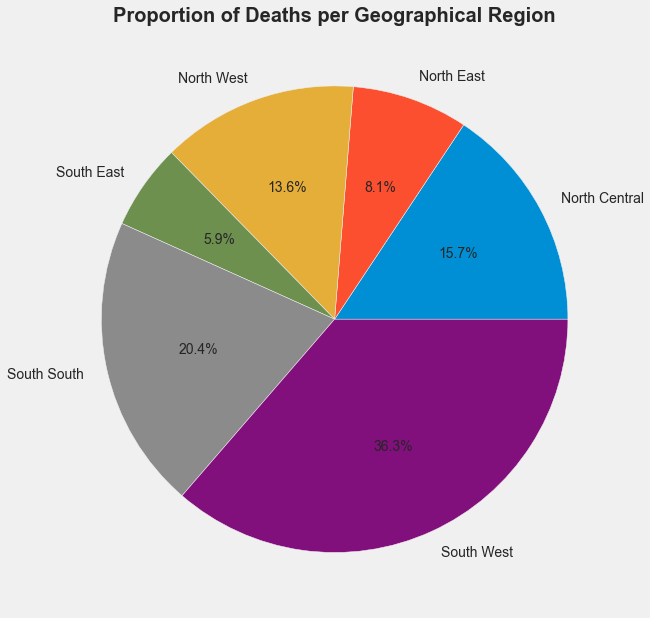

In [59]:
#Aggregate death cases

reg_D = reg_grps.agg({"deaths": "sum"})

#Create figure object and plot

plt.figure(figsize= (15,10))
plt.pie(reg_D.deaths, labels=reg_D.index, autopct='%1.1f%%')

#Set plot title

plt.title("Proportion of Deaths per Geographical Region", fontdict = {"fontsize": 20, "fontweight": "bold"})

plt.show()

### SUMMARY
#### ‣ Based on geopolitical zones, the South West, has the highest number of death cases resulting from Covid19, followed by South South, then North Central
#### ‣ This representation is consistent with the plot showing the number of death cases in the first 10 states, suggesting that the states with the highest figures, have a significant impact on the overall regional statistics of Nigeria

### Compare Vulnerability index with mortality rate of top 10 states with death cases

In [60]:
VI_MR = merged_cov_data.sort_values(by = "Overall CCVI Index", ascending= False)

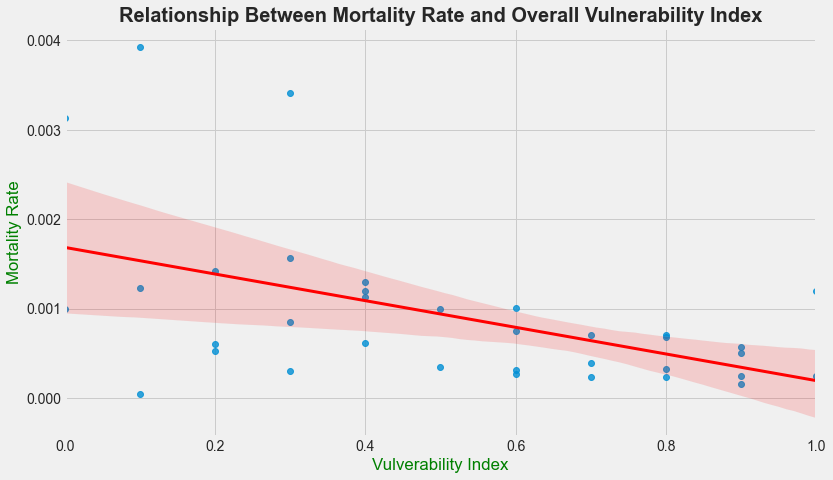

In [61]:
#Create figure object and plot

plt.figure(figsize= (12, 7))
sns.regplot(x = VI_MR['Overall CCVI Index'], y = "Mortality rate (%)", data=VI_MR, line_kws={"color":"r","lw":3})

#Set plot title and axes labels
plt.title("Relationship Between Mortality Rate and Overall Vulnerability Index", fontdict= {"fontsize": 20, "fontweight": "bold"})
plt.xlabel("Vulverability Index", color = "g")
plt.ylabel("Mortality Rate", color = "g")

plt.show()

## SUMMARY
#### ‣ Vulnerability Index is important in preparation, management and response to disease outbreaks
#### ‣ This plot shows a negative correlation between mortality rate and vulnerability index of states within Nigeria
#### ‣ The negative correlation indicates that states with lower vulnerability indices, have higher mortality rates
#### ‣ This information suggests, states with higher vulnerability indices, were focused more on in preparation and response to Covid19, while states with lower vulnerabilty indices, lagged behind in preparedness and response, consequently leading to more death cases in these states

##### Plot a graph showing states with top 10 highest vulnerability indices and states with top 10 mortality rates

In [62]:
top10V = merged_cov_data.nlargest(10,"Overall CCVI Index")
top10Mort = merged_cov_data.nlargest(10, "Mortality rate (%)")

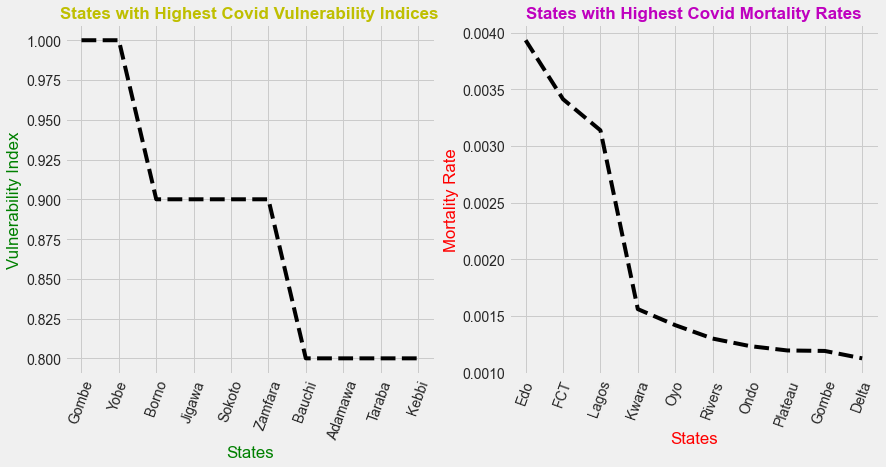

In [63]:
#Create figure object

plt.figure(figsize= (13,6))

#Values for first subplot
x1_values = top10V['states']
y1_values = top10V['Overall CCVI Index']

#Plot values
plt.subplot(1, 2, 1)
plt.plot(x1_values, y1_values, color= "black", ls = "--")

#Rotate tick labels for readability
plt.xticks(rotation=70)

#Set plot title and axes labels
plt.title("States with Highest Covid Vulnerability Indices",fontdict = {"fontsize": 17, "fontweight": "bold"}, color = "y")
plt.xlabel("States", color = "g")
plt.ylabel("Vulnerability Index", color = "g")


#Values for second subplot
x2_values = top10Mort['states']
y2_values = top10Mort['Mortality rate (%)']

#Plot values
plt.subplot(1, 2, 2)
plt.plot(x2_values, y2_values,color= "black", ls = "--")

#Rotate tick labels for readability
plt.xticks(rotation=70)

#Set plot title and axes labels
plt.title("States with Highest Covid Mortality Rates",fontdict = {"fontsize": 17, "fontweight": "bold"}, color = "m")
plt.xlabel("States", color = "r")
plt.ylabel("Mortality Rate", color = "r")

plt.show()



### SUMMARY

#### ‣ These subplots support the established relationship between the overall vulnerabilility index and the mortality rates
#### ‣ States with the highest vulnerability indices, do not feature on the graph with the highest mortality rates vice versa

## TODO L: Determine the effect of the Pandemic on the economy

In [64]:
yearly_gdp = pd.melt(gdp_df, ["Year"], var_name= "Yearly Quarter", value_name= "GDP")

In [65]:
gdp_2014 = yearly_gdp[yearly_gdp['Year'] == 2014]
gdp_2015 = yearly_gdp[yearly_gdp['Year'] == 2015]
gdp_2016 = yearly_gdp[yearly_gdp['Year'] == 2016]
gdp_2017 = yearly_gdp[yearly_gdp['Year'] == 2017]
gdp_2018 = yearly_gdp[yearly_gdp['Year'] == 2018]
gdp_2019 = yearly_gdp[yearly_gdp['Year'] == 2019]
gdp_2020 = yearly_gdp[yearly_gdp['Year'] == 2020]


In [66]:
gdp_2020[gdp_2020["Yearly Quarter"] == "Q2"]

,Year,Yearly Quarter,GDP
13,2020,Q2,15890000.0


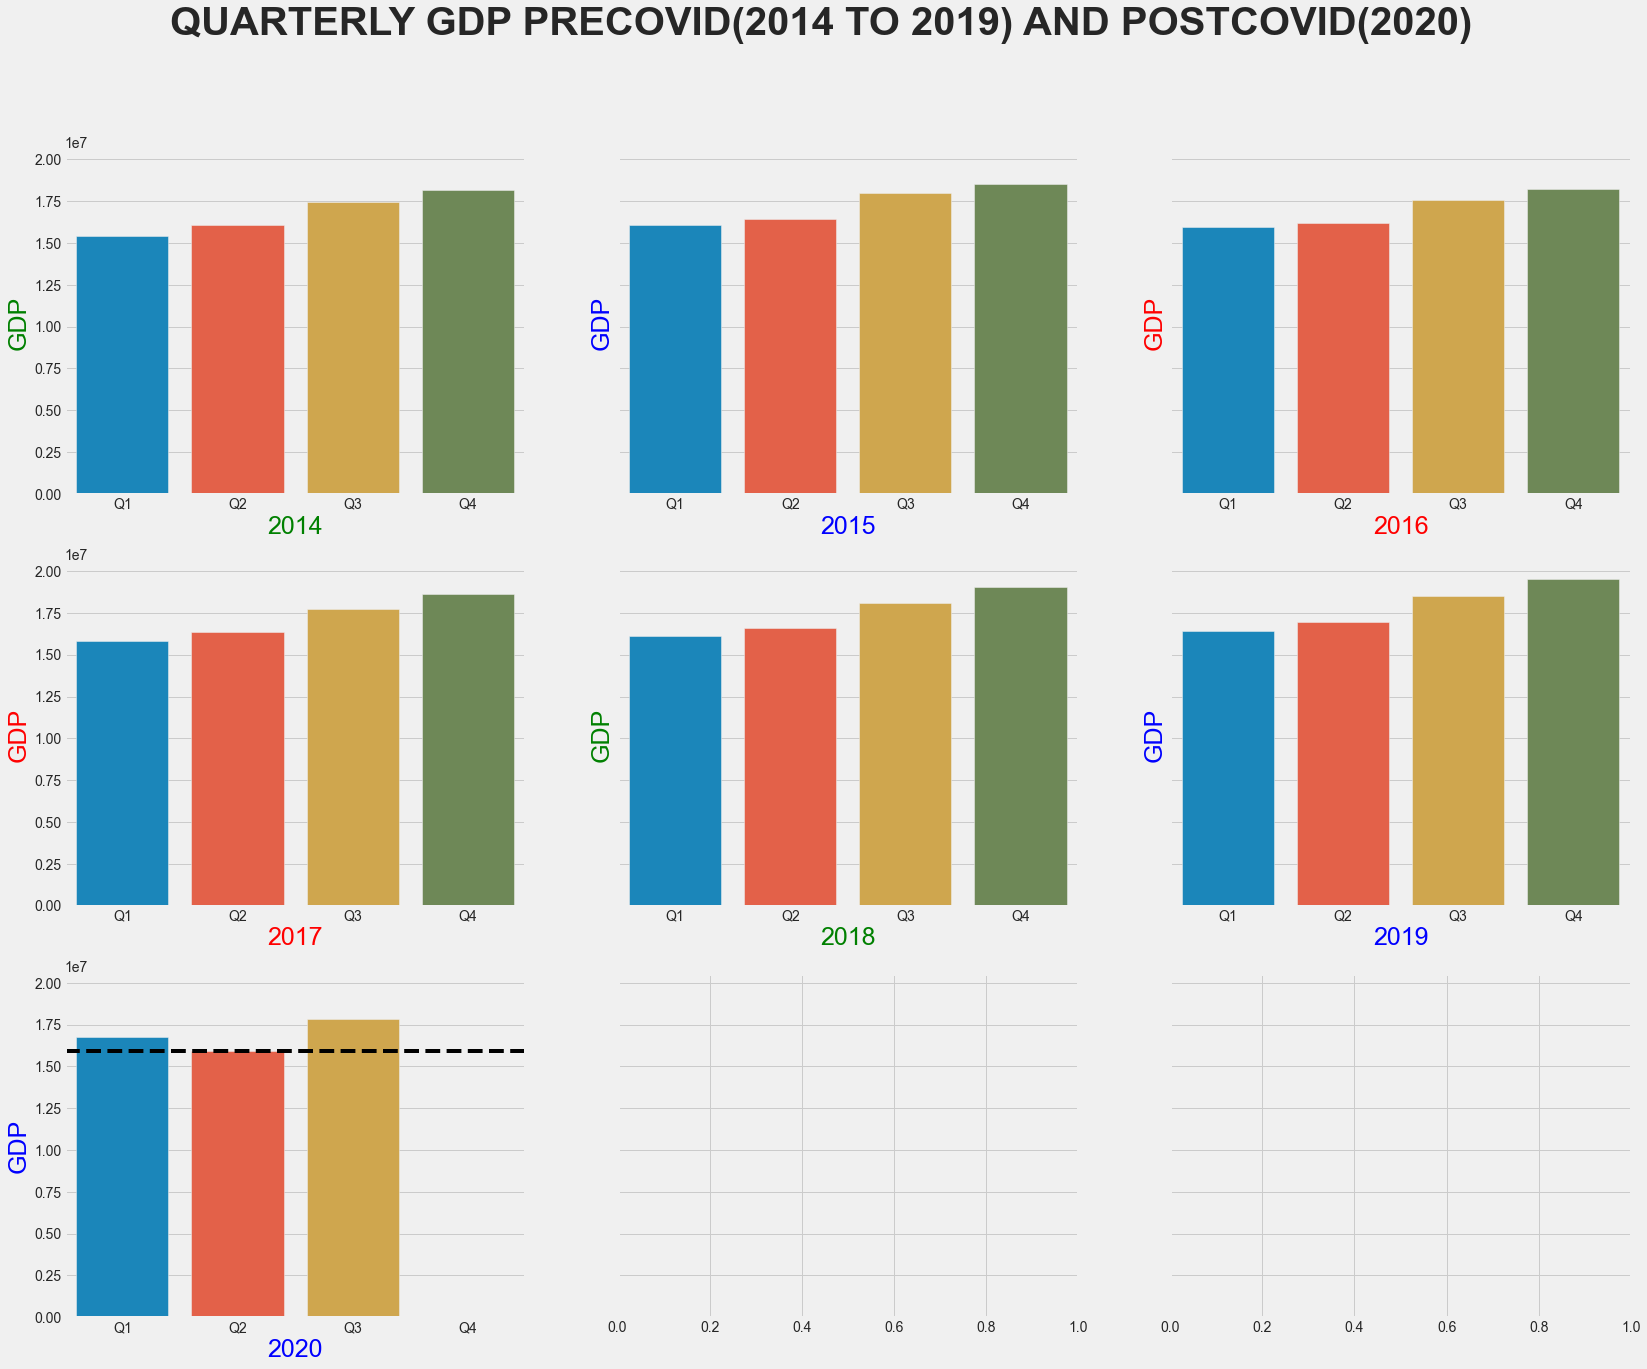

In [67]:
#Create figure object with multiple axes

fig, axes = plt.subplots(3, 3, figsize=(25, 20), sharey=True)

#Set plot title
fig.suptitle('QUARTERLY GDP PRECOVID(2014 TO 2019) AND POSTCOVID(2020)', fontsize= 40, fontweight= "bold")

#Plot 2014 subplot and set labels
plt_2014 = sns.barplot(ax=axes[0, 0], data=gdp_2014, x='Yearly Quarter', y='GDP')
plt_2014.set_xlabel("2014", fontdict= {'fontsize': 25}, color = "g")
plt_2014.set_ylabel("GDP", fontdict= {'fontsize': 25}, color = "g")

#Plot 2015 subplot and set labels
plt_2015 = sns.barplot(ax=axes[0, 1], data=gdp_2015, x='Yearly Quarter', y='GDP')
plt_2015.set_xlabel("2015", fontdict= {'fontsize': 25}, color = "b")
plt_2015.set_ylabel("GDP", fontdict= {'fontsize': 25}, color = "b")

#Plot 2016 subplot and set labels
plt_2016 = sns.barplot(ax=axes[0, 2], data=gdp_2016, x='Yearly Quarter', y='GDP')
plt_2016.set_xlabel("2016", fontdict= {'fontsize': 25}, color = "r")
plt_2016.set_ylabel("GDP", fontdict= {'fontsize': 25}, color = "r")

#Plot 2017 subplot and set labels
plt_2017 = sns.barplot(ax=axes[1, 0], data=gdp_2017, x='Yearly Quarter', y='GDP')
plt_2017.set_xlabel("2017", fontdict= {'fontsize': 25}, color = "r")
plt_2017.set_ylabel("GDP", fontdict= {'fontsize': 25}, color = "r")

#Plot 2018 subplot and set labels
plt_2018 = sns.barplot(ax=axes[1, 1], data=gdp_2018, x='Yearly Quarter', y='GDP')
plt_2018.set_xlabel("2018", fontdict= {'fontsize': 25}, color = "g")
plt_2018.set_ylabel("GDP", fontdict= {'fontsize': 25}, color = "g")

#Plot 2019 subplot and set labels
plt_2019 = sns.barplot(ax=axes[1, 2], data=gdp_2019, x='Yearly Quarter', y='GDP')
plt_2019.set_xlabel("2019", fontdict= {'fontsize': 25}, color = "b")
plt_2019.set_ylabel("GDP", fontdict= {'fontsize': 25}, color = "b")

#Plot 2020 subplot and set labels
plt_2020 = sns.barplot(ax=axes[2, 0], data=gdp_2020, x='Yearly Quarter', y='GDP')
plt_2020.set_xlabel("2020", fontdict= {'fontsize': 25}, color = "b")
plt_2020.set_ylabel("GDP", fontdict= {'fontsize': 25}, color = "b")

#Draw a horizontal line at the value of Q2 2020
plt_2020.axhline(15890000.0, color= 'black', linestyle = "--")

plt.show()

### SUMMARY

#### ‣ This plot shows Covid19 had a negative effect on the real GDP of Nigeria, particularly in the initial hit period of the disease (Q2)
#### ‣ There was a significant decrease in the GDP in second quarter compared to the first and third quarter
#### ‣ This pattern negates the patterns observed in previous years which show a progressive GDP increase as the yearly quarter increases